In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns',50)
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv("../input/predict-the-churn-for-customer-dataset/Train File.csv")
test = pd.read_csv("../input/predict-the-churn-for-customer-dataset/Test File.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 21 columns):
customerID          4224 non-null object
gender              4224 non-null object
SeniorCitizen       4224 non-null int64
Partner             4224 non-null object
Dependents          4224 non-null object
tenure              4224 non-null int64
PhoneService        4224 non-null object
MultipleLines       4224 non-null object
InternetService     4224 non-null object
OnlineSecurity      4224 non-null object
OnlineBackup        4224 non-null object
DeviceProtection    4224 non-null object
TechSupport         4224 non-null object
StreamingTV         4224 non-null object
StreamingMovies     4224 non-null object
Contract            4224 non-null object
PaperlessBilling    4224 non-null object
PaymentMethod       4224 non-null object
MonthlyCharges      4224 non-null float64
TotalCharges        4217 non-null float64
Churn               4224 non-null object
dtypes: float64(2), int64(2), ob

In [4]:
train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
Churn               0
dtype: int64

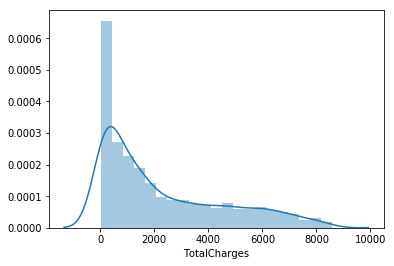

In [5]:
sns.distplot(train['TotalCharges'].dropna())

In [6]:
train.fillna(train['TotalCharges'].median(), inplace=True)
test.fillna(train['TotalCharges'].median(), inplace=True)

In [7]:
for i in train.columns :
    print(i,' :')
    print(train[i].value_counts())

customerID  :
3956-CJUST    1
3643-AHCFP    1
7274-CGTOD    1
0268-QKIWO    1
0999-QXNSA    1
             ..
8788-DOXSU    1
2929-ERCFZ    1
1474-JUWSM    1
9959-WOFKT    1
8715-KKTFG    1
Name: customerID, Length: 4224, dtype: int64
gender  :
Male      2153
Female    2071
Name: gender, dtype: int64
SeniorCitizen  :
0    3553
1     671
Name: SeniorCitizen, dtype: int64
Partner  :
No     2197
Yes    2027
Name: Partner, dtype: int64
Dependents  :
No     2960
Yes    1264
Name: Dependents, dtype: int64
tenure  :
1     371
72    227
2     152
3     118
4     111
     ... 
38     32
36     29
39     29
44     26
0       7
Name: tenure, Length: 73, dtype: int64
PhoneService  :
Yes    3830
No      394
Name: PhoneService, dtype: int64
MultipleLines  :
No                  2029
Yes                 1801
No phone service     394
Name: MultipleLines, dtype: int64
InternetService  :
Fiber optic    1852
DSL            1451
No              921
Name: InternetService, dtype: int64
OnlineSecurity  :
No  

In [8]:
train['gender'] = train['gender'].map({'Female':0, 'Male':1})
test['gender'] = test['gender'].map({'Female':0, 'Male':1})

train['Partner'] = train['Partner'].map({'Yes':1,'No':0})
test['Partner'] = test['Partner'].map({'Yes':1,'No':0})

train['Dependents'] = train['Dependents'].map({'Yes':1,'No':0})
test['Dependents'] = test['Dependents'].map({'Yes':1,'No':0})

train['PhoneService'] = train['PhoneService'].map({'Yes':1,'No':0})
test['PhoneService'] = test['PhoneService'].map({'Yes':1,'No':0})

train['MultipleLines'] = train['MultipleLines'].map({'Yes':1,'No':0, 'No phone service':0})
test['MultipleLines'] = test['MultipleLines'].map({'Yes':1,'No':0, 'No phone service':0})

train['OnlineSecurity'] = train['OnlineSecurity'].map({'Yes':1,'No':0, 'No internet service':0})
test['OnlineSecurity'] = test['OnlineSecurity'].map({'Yes':1,'No':0, 'No internet service':0})

train['OnlineBackup'] = train['OnlineBackup'].map({'Yes':1,'No':0, 'No internet service':0})
test['OnlineBackup'] = test['OnlineBackup'].map({'Yes':1,'No':0, 'No internet service':0})

train['DeviceProtection'] = train['DeviceProtection'].map({'Yes':1,'No':0, 'No internet service':0})
test['DeviceProtection'] = test['DeviceProtection'].map({'Yes':1,'No':0, 'No internet service':0})

train['TechSupport'] = train['TechSupport'].map({'Yes':1,'No':0, 'No internet service':0})
test['TechSupport'] = test['TechSupport'].map({'Yes':1,'No':0, 'No internet service':0})

train['StreamingTV'] = train['StreamingTV'].map({'Yes':1,'No':0, 'No internet service':0})
test['StreamingTV'] = test['StreamingTV'].map({'Yes':1,'No':0, 'No internet service':0})

train['StreamingMovies'] = train['StreamingMovies'].map({'Yes':1,'No':0, 'No internet service':0})
test['StreamingMovies'] = test['StreamingMovies'].map({'Yes':1,'No':0, 'No internet service':0})

train['PaperlessBilling'] = train['PaperlessBilling'].map({'Yes':1,'No':0})
test['PaperlessBilling'] = test['PaperlessBilling'].map({'Yes':1,'No':0})

train['Churn'] = train['Churn'].map({'Yes':1,'No':0})

In [9]:
train.drop('customerID', axis=1, inplace=True)
ans_id = test['customerID']
test.drop('customerID', axis=1, inplace=True)

In [10]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [11]:
x = train.drop('Churn', axis=1)
y = train['Churn'].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
test = scaler.transform(test)

In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.01)


In [14]:
from sklearn.feature_selection import RFE
rfe = RFE(xgb, 10)
rfe.fit(x,y)
x = x[:,rfe.get_support()]
test = test[:,rfe.get_support()]

In [15]:
xgb.fit(x,y)
xgb.score(x,y)

0.8087121212121212

In [16]:
ans=xgb.predict(test)

In [17]:
ans = pd.DataFrame(ans, columns=['Churn'])

In [18]:
ans['customerID'] = ans_id

In [19]:
ans['Churn'] = ans['Churn'].map({0:'No', 1:'Yes'})

In [20]:
ans.set_index('customerID', inplace=True)

In [21]:
ans.to_csv('Raj Naruka Submission 1.csv')